In [1]:
import pandas as pd
import matplotlib.pyplot as plt


In [2]:
df = pd.read_csv("Social_Network_Ads.csv")

In [7]:
df.head()

,User ID,Gender,Age,EstimatedSalary,Purchased
0,15624510,Male,19,19000,0
1,15810944,Male,35,20000,0
2,15668575,Female,26,43000,0
3,15603246,Female,27,57000,0
4,15804002,Male,19,76000,0


In [5]:
df.isnull().sum()

User ID            0
Gender             0
Age                0
EstimatedSalary    0
Purchased          0
dtype: int64

In [6]:
#The goal is to predict whether a user will purchase a product based on age and estimated salary.

In [12]:
x = df.iloc[:,2:4].values
y = df.iloc[:,-1].values

In [14]:
y

array([0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1,
       0, 1, 1, 1, 0, 0, 1, 1, 0, 1, 1, 0, 1, 1, 0, 1, 0, 0, 0, 1, 1, 0,
       1, 1, 0, 1, 0, 1, 0, 1, 0, 0, 1, 1, 0, 1, 0, 0, 1, 1, 0, 1, 1, 0,
       1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1,
       0, 1, 0, 1, 1, 1, 1, 0, 0, 0, 1, 1, 0, 1, 1,

In [15]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size = 0.2,random_state=42)

In [16]:
from sklearn.preprocessing import StandardScaler
sc= StandardScaler()
x_train = sc.fit_transform(x_train)
x_test = sc.transform(x_test)

In [18]:
from sklearn.tree import DecisionTreeClassifier
classifier = DecisionTreeClassifier(
    criterion= "entropy"
)
classifier.fit(x_train,y_train)

DecisionTreeClassifier(criterion='entropy')

In [23]:
y_pred = classifier.predict(x_test)

In [24]:
print(y_pred)

[1 1 0 0 0 0 1 0 0 0 0 1 0 0 0 1 1 1 0 1 0 0 1 1 0 1 1 0 1 0 0 0 1 0 1 0 0
 0 0 0 1 0 0 1 0 1 0 0 0 0 0 0 0 0 0 0 1 1 0 0 0 0 1 0 0 1 1 0 0 1 0 0 0 0
 1 0 1 1 0 0]


In [25]:
from sklearn.metrics import accuracy_score


In [27]:
accuracy = accuracy_score(y_test,y_pred)
print(accuracy)

0.8375


In [30]:
from sklearn.metrics import confusion_matrix
print(confusion_matrix(y_test,y_pred))

[[46  6]
 [ 7 21]]


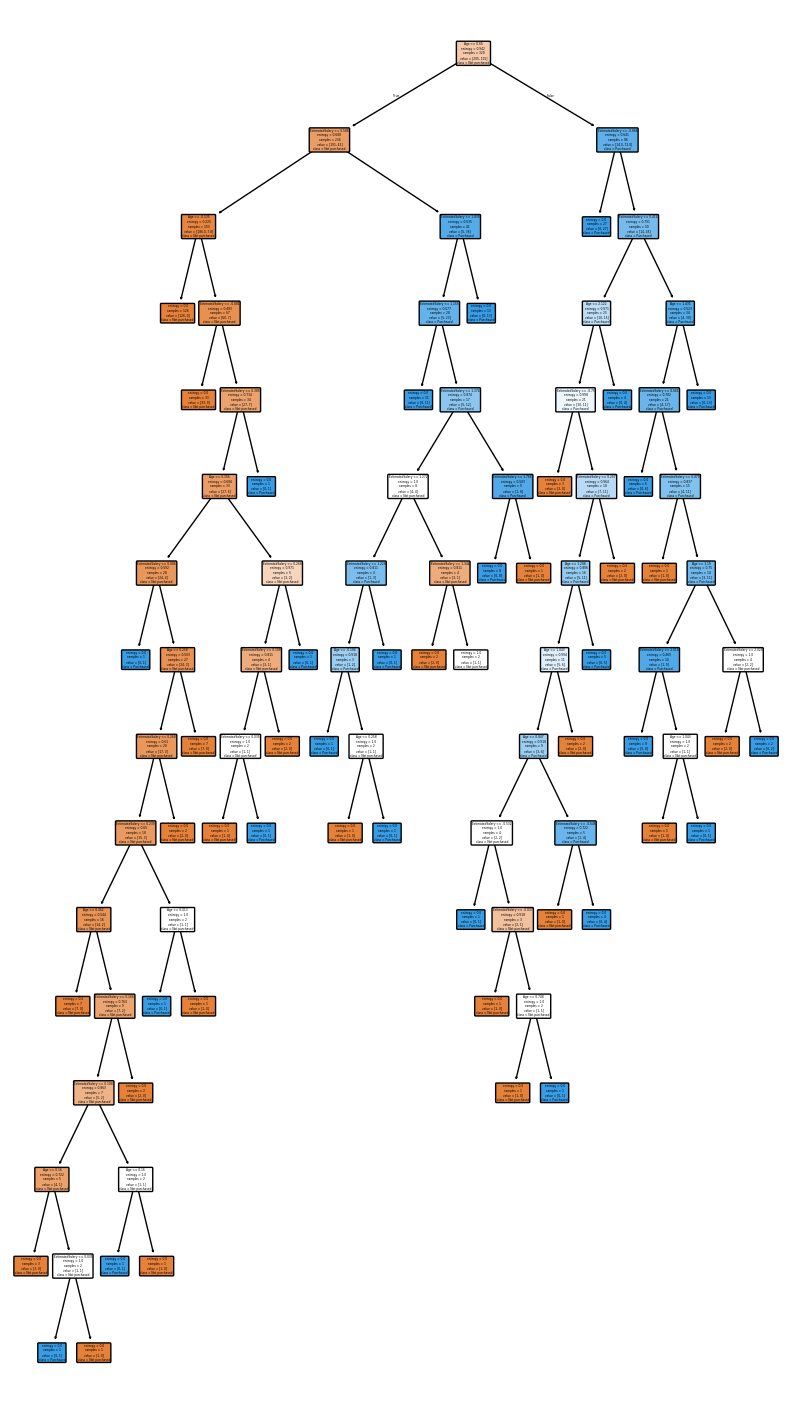

In [36]:
from sklearn.tree import plot_tree
plt.figure(figsize=(10,18))

plot_tree(
    classifier,
    feature_names = ["Age","EstimatedSalary"],
    class_names = ["Not purchased","Purchased"],
    filled = True,
    rounded = True
)
plt.show()

In [40]:
classifier = DecisionTreeClassifier(
    criterion = "entropy",max_depth = 4)
classifier.fit(x_train,y_train)
y_pred = classifier.predict(x_test)

In [41]:
print(accuracy_score(y_test,y_pred))

0.9125


<Axes: >

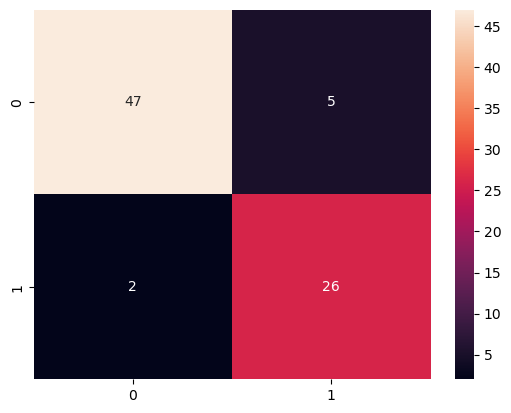

In [44]:
import seaborn as sns
cm = confusion_matrix(y_test,y_pred)
sns.heatmap(cm,annot = True)

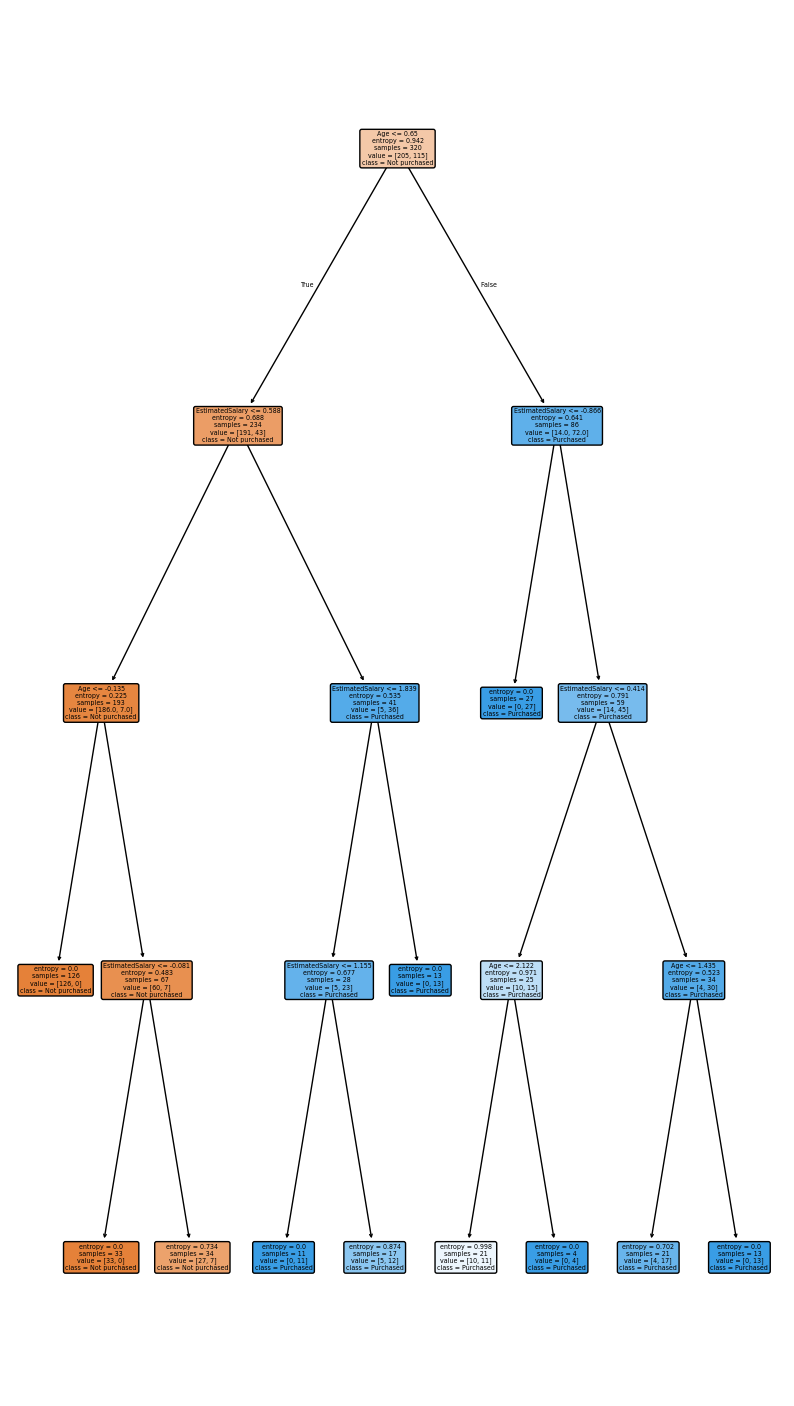

In [45]:
from sklearn.tree import plot_tree
plt.figure(figsize=(10,18))

plot_tree(
    classifier,
    feature_names = ["Age","EstimatedSalary"],
    class_names = ["Not purchased","Purchased"],
    filled = True,
    rounded = True
)
plt.show()

#Use titanic passenger data

In [46]:
df = sns.load_dataset("titanic")

In [47]:
df

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,0,2,male,27.0,0,0,13.0000,S,Second,man,True,NaN,Southampton,no,True
887,1,1,female,19.0,0,0,30.0000,S,First,woman,False,B,Southampton,yes,True
888,0,3,female,NaN,1,2,23.4500,S,Third,woman,False,NaN,Southampton,no,False
889,1,1,male,26.0,0,0,30.0000,C,First,man,True,C,Cherbourg,yes,True


In [49]:
df.isnull().sum()

survived         0
pclass           0
sex              0
age            177
sibsp            0
parch            0
fare             0
embarked         2
class            0
who              0
adult_male       0
deck           688
embark_town      2
alive            0
alone            0
dtype: int64

In [50]:
df.head(10)

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True
5,0,3,male,NaN,0,0,8.4583,Q,Third,man,True,NaN,Queenstown,no,True
6,0,1,male,54.0,0,0,51.8625,S,First,man,True,E,Southampton,no,True
7,0,3,male,2.0,3,1,21.0750,S,Third,child,False,NaN,Southampton,no,False
8,1,3,female,27.0,0,2,11.1333,S,Third,woman,False,NaN,Southampton,yes,False
9,1,2,female,14.0,1,0,30.0708,C,Second,child,False,NaN,Cherbourg,yes,False


In [51]:
df = df[["survived","pclass","sex","age","fare","embarked"]]

In [52]:
df.head()


,survived,pclass,sex,age,fare,embarked
0,0,3,male,22.0,7.2500,S
1,1,1,female,38.0,71.2833,C
2,1,3,female,26.0,7.9250,S
3,1,1,female,35.0,53.1000,S
4,0,3,male,35.0,8.0500,S


In [53]:
df.isnull().sum()

survived      0
pclass        0
sex           0
age         177
fare          0
embarked      2
dtype: int64

In [54]:
df["age"].fillna(df["age"].median(),inplace=True)
df["embarked"].fillna(df["embarked"].mode()[0],inplace=True)

C:\Users\bojja\AppData\Local\Temp\ipykernel_9112\1366853010.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df["age"].fillna(df["age"].median(),inplace=True)
C:\Users\bojja\AppData\Local\Temp\ipykernel_9112\1366853010.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["age"].fillna(df["age"].median(),inplace=True)
C:\Users\bojja\AppDat

In [56]:
df.isnull().sum()

survived    0
pclass      0
sex         0
age         0
fare        0
embarked    0
dtype: int64

In [58]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
df["sex"] = le.fit_transform(df["sex"])
df["embarked"] = le.fit_transform(df["embarked"])

C:\Users\bojja\AppData\Local\Temp\ipykernel_9112\152632254.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["sex"] = le.fit_transform(df["sex"])
C:\Users\bojja\AppData\Local\Temp\ipykernel_9112\152632254.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["embarked"] = le.fit_transform(df["embarked"])


In [63]:
x = df.drop("survived",axis = 1)
y = df["survived"]

x_train,x_test,y_train,y_test = train_test_split(x,y,test_size = 0.2,random_state=42)

In [64]:
classifier = DecisionTreeClassifier(
    criterion = "gini")
classifier.fit(x_train,y_train)
y_pred = classifier.predict(x_test)

In [65]:
print(accuracy_score(y_test,y_pred))

0.7821229050279329


In [66]:
cm = confusion_matrix(y_test,y_pred)

In [67]:
cm

array([[82, 23],
       [16, 58]], dtype=int64)

<Axes: >

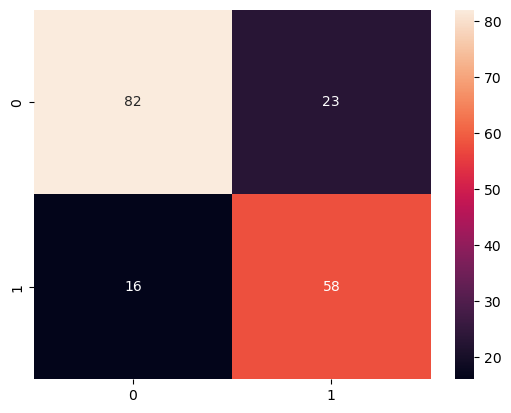

In [68]:
sns.heatmap(cm,annot=True)

In [69]:
classifier = DecisionTreeClassifier(
    criterion = "gini",max_depth=4)
classifier.fit(x_train,y_train)
y_pred = classifier.predict(x_test)

In [70]:
print(accuracy_score(y_test,y_pred))

0.7988826815642458


<Axes: >

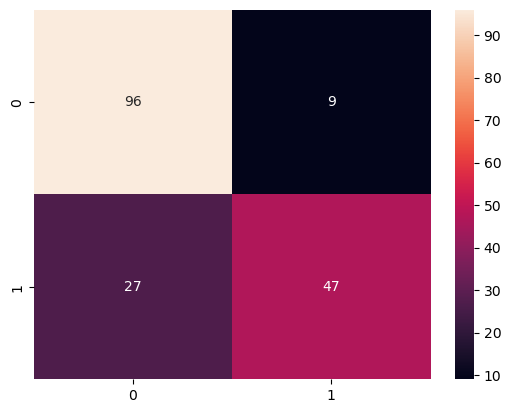

In [71]:
cm = confusion_matrix(y_test,y_pred)
sns.heatmap(cm,annot=True)

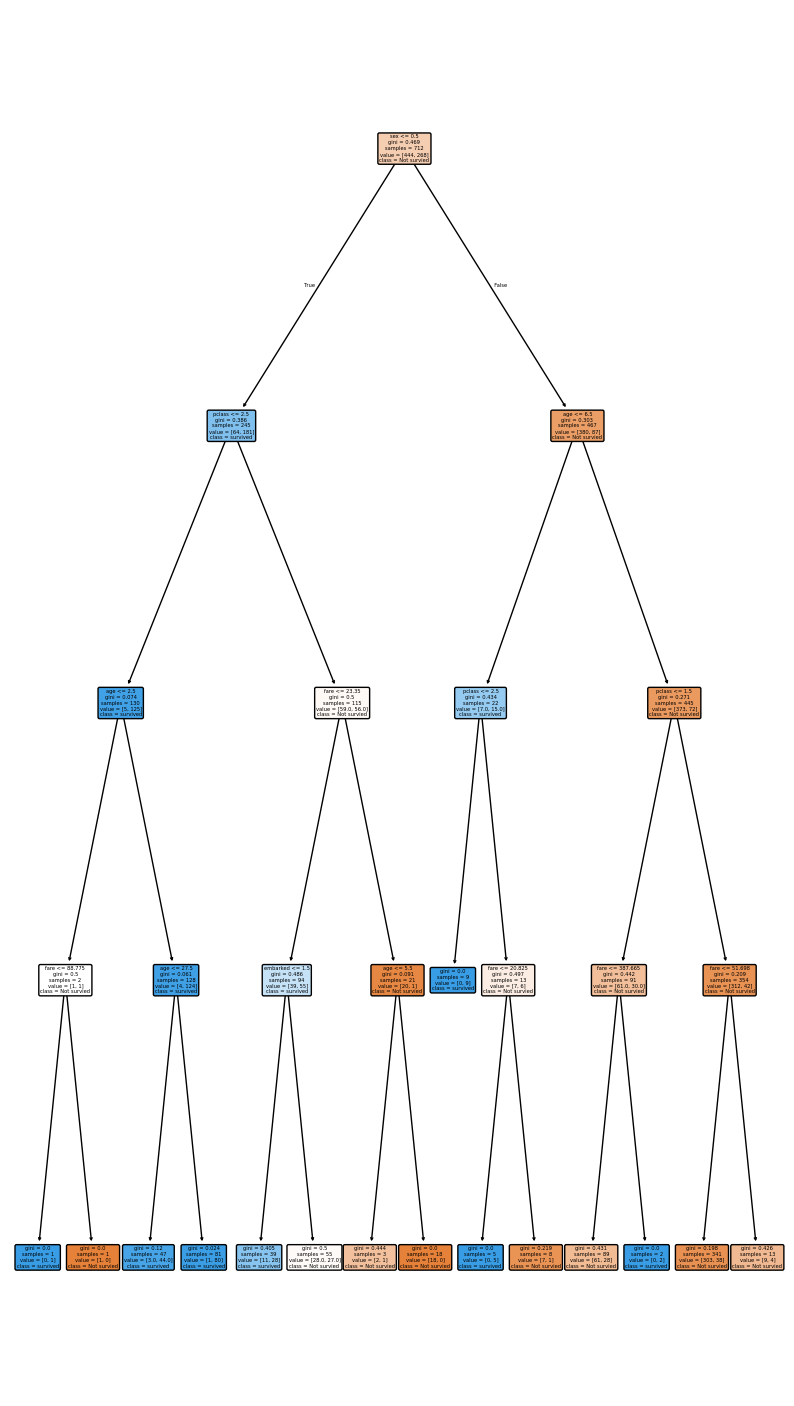

In [72]:
from sklearn.tree import plot_tree
plt.figure(figsize=(10,18))

plot_tree(
    classifier,
    feature_names = ["pclass","sex","age","fare","embarked"],
    class_names = ["Not survied","survived"],
    filled = True,
    rounded = True
)
plt.show()

In [75]:
new_pass = pd.DataFrame([[3,1,25,7,2]],columns=x.columns)
pred = classifier.predict(new_pass)
pred

array([0], dtype=int64)

In [76]:
if pred[0] == 1:
    print("Survived")
else:
    print("Not survived")

Not survived
